# loss function

In [2]:
# Define the model
import tensorflow as tf
class Model(object):
    def __init__(self):
        self.w=tf.Variable(6.0)
        self.b=tf.Variable(0.0)
  
    def __call__(self,x):
        return self.w*x + self.b

model=Model()
assert model(4.0).numpy()

In [3]:
#Define loss function

def loss(target_y,predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))


In [4]:
#normalization of the data
TRUE_W=3.0
TRUE_b=2.0
num_example=1000
inputs=tf.random.normal(shape=[num_example])
noise=tf.random.normal(shape=[num_example])
outputs= inputs*TRUE_W+ TRUE_b+noise

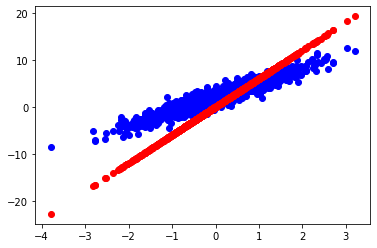

current loss: 13.790031


In [5]:
import matplotlib.pyplot as plt

plt.scatter(inputs,outputs,c='b')
plt.scatter(inputs,model(inputs),c='r')
plt.show()

print("current loss: %1.6f" %loss(model(inputs),outputs).numpy())

In [7]:
#define a training loop
def train (model, inputs,outputs,learning_rate):
    with tf.GradientTape() as t:
        current_loss=loss(outputs,model(inputs))
    dW,db=t.gradient(current_loss,[model.w,model.b])
    model.w.assign_sub(learning_rate*dW)
    model.b.assign_sub(learning_rate*db)

Epoch  0: w=6.00 b=0.00,loss=13.79003
Epoch  1: w=5.39 b=0.38,loss=9.20993
Epoch  2: w=4.91 b=0.68,loss=6.27804
Epoch  3: w=4.53 b=0.93,loss=4.40055
Epoch  4: w=4.22 b=1.13,loss=3.19783
Epoch  5: w=3.98 b=1.30,loss=2.42711
Epoch  6: w=3.79 b=1.43,loss=1.93304
Epoch  7: w=3.63 b=1.54,loss=1.61623
Epoch  8: w=3.51 b=1.62,loss=1.41300
Epoch  9: w=3.41 b=1.69,loss=1.28261


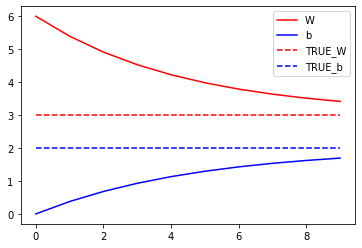

In [8]:
model=Model()

#collect the history of weights and bias to plot later
Ws,bs=[],[]
epochs=range(10)
for epoch in epochs:
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss=loss(outputs,model(inputs))

    train(model,inputs,outputs,learning_rate=0.1)
    print("Epoch %2d: w=%1.2f b=%1.2f,loss=%2.5f" %(epoch,Ws[-1],bs[-1],current_loss))

plt.plot(epochs,Ws,'r', epochs, bs,'b')
plt.plot([TRUE_W]*len(epochs),"r--",
         [TRUE_b]*len(epochs),"b--")
plt.legend(['W','b','TRUE_W','TRUE_b'])
plt.show()